In [ ]:
import pandas as pd
import numpy as np
IMAGELOC='./data/Flicker8k_Dataset/'

Flickr8k.token.txt - the raw captions of the Flickr8k Dataset . The first column is the ID of the caption which is "image address # caption number"

Flickr8k.lemma.txt - the lemmatized version of the above captions 

Flickr_8k.trainImages.txt - The training images used in our experiments  
Flickr_8k.devImages.txt - The development/validation images used in our experiments  
Flickr_8k.testImages.txt - The test images used in our experiments 

In [ ]:
df = pd.read_csv("./data/Flickr8k_text/Flickr8k.token.txt",header=None, sep='\t',engine='python',names=['image','description'])
df[['image','did']] = df.image.str.split("#",expand=True,)


print(len(df))
df.head(3)

In [ ]:
dftrain=pd.read_csv("./data/Flickr8k_text/Flickr_8k.trainImages.txt",header=None,engine='python',names=['image'])
dftrain['type']='train'
dftest=pd.read_csv("./data/Flickr8k_text/Flickr_8k.testImages.txt",header=None,engine='python',names=['image'])
dftest['type']='test'
dfval=pd.read_csv("./data/Flickr8k_text/Flickr_8k.devImages.txt",header=None,engine='python',names=['image'])
dfval['type']='val'

In [ ]:
_dataframes=[dftrain,dftest,dfval]
mergeddfs=pd.concat(_dataframes)

df=pd.merge(df,mergeddfs)

In [ ]:
df['image']=IMAGELOC + df['image']

In [ ]:
df['type'].value_counts()

In [ ]:
from transformers import ViTFeatureExtractor, ViTForImageClassification
from PIL import Image
import requests
url = 'http://images.cocodataset.org/val2017/000000039769.jpg'


feature_extractor = ViTFeatureExtractor.from_pretrained('google/vit-base-patch32-384')
model = ViTForImageClassification.from_pretrained('google/vit-base-patch32-384')



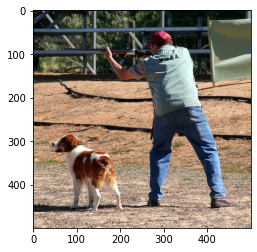

Caption: A man , a gun , and a dog .
Caption: A man aiming a rifle with a dog standing beside him .
Caption: A man shoots a rifle while a dog looks on .
Caption: Man aiming a rifle with his dog at his side .
Caption: The man is aiming to shoot something while his dog watches .


In [39]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#select any index from the whole dataset 
#single image has 5 captions
data_idx = 359
data_idx=data_idx*5
image_path = df.iloc[data_idx,0]
img=mpimg.imread(image_path)
plt.imshow(img)
plt.show()

#image consits of 5 captions,
#showing all 5 captions of the image of the given idx 
for i in range(data_idx,data_idx+5):
    print("Caption:",df.iloc[i,1])


In [40]:
url=image_path
image = Image.open(url)
inputs = feature_extractor(images=image, return_tensors="pt")
outputs = model(**inputs)
logits = outputs.logits
# model predicts one of the 1000 ImageNet classes
predicted_class_idx = logits.argmax(-1).item()
print("Predicted class:", model.config.id2label[predicted_class_idx])



Predicted class: Welsh springer spaniel
